In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

resultDf = pd.read_csv('benchmark_results.csv')
resultDf

,TestType,NumOrders,NumLookups,Insert,Modify,Delete,Total,LookupTime
0,OrderBook_Benchmark,10000,0,0.029522,0.015614,0.004269,0.051923,0.000000
1,OptimizedOrderBook_Benchmark,10000,0,0.005628,0.002418,0.002233,0.010278,0.000000
2,OrderBook_Lookup,10000,1000,0.000000,0.000000,0.000000,0.000000,0.000266
3,OptimizedOrderBook_Lookup,10000,1000,0.000000,0.000000,0.000000,0.000000,0.000272
4,OrderBook_Lookup,10000,10000,0.000000,0.000000,0.000000,0.000000,0.002341
5,OptimizedOrderBook_Lookup,10000,10000,0.000000,0.000000,0.000000,0.000000,0.002483
6,OrderBook_Lookup,10000,100000,0.000000,0.000000,0.000000,0.000000,0.025362
7,OptimizedOrderBook_Lookup,10000,100000,0.000000,0.000000,0.000000,0.000000,0.024700
8,OrderBook_Lookup,10000,500000,0.000000,0.000000,0.000000,0.000000,0.171752
9,OptimizedOrderBook_Lookup,10000,500000,0.000000,0.000000,0.000000,0.000000,0.125712


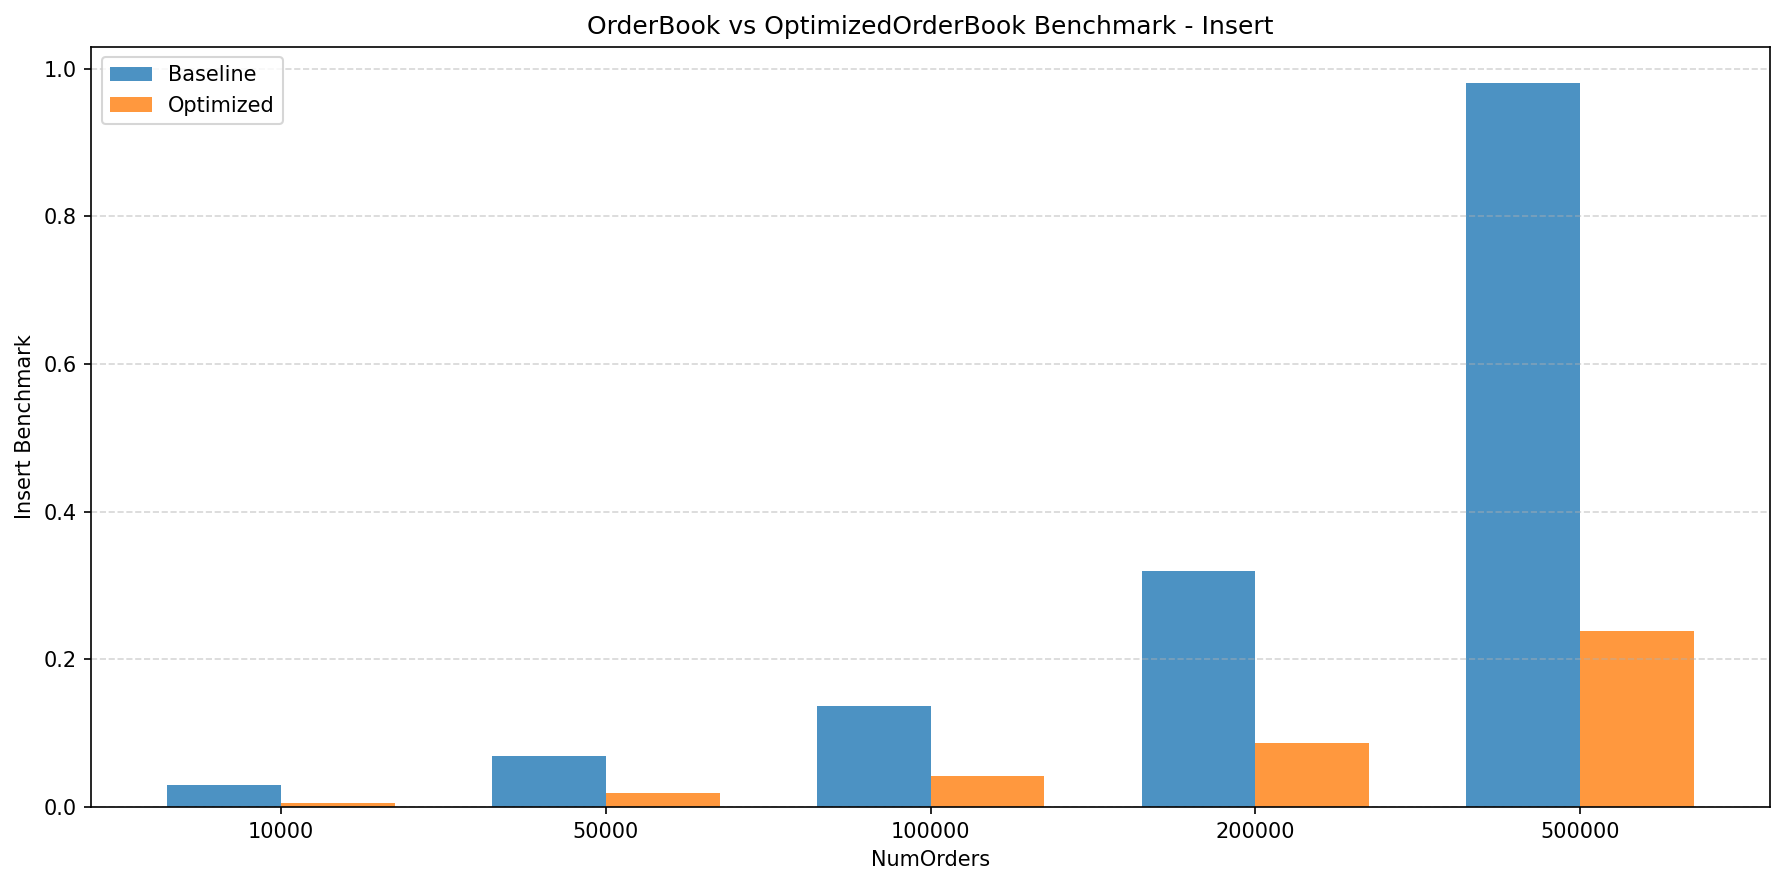

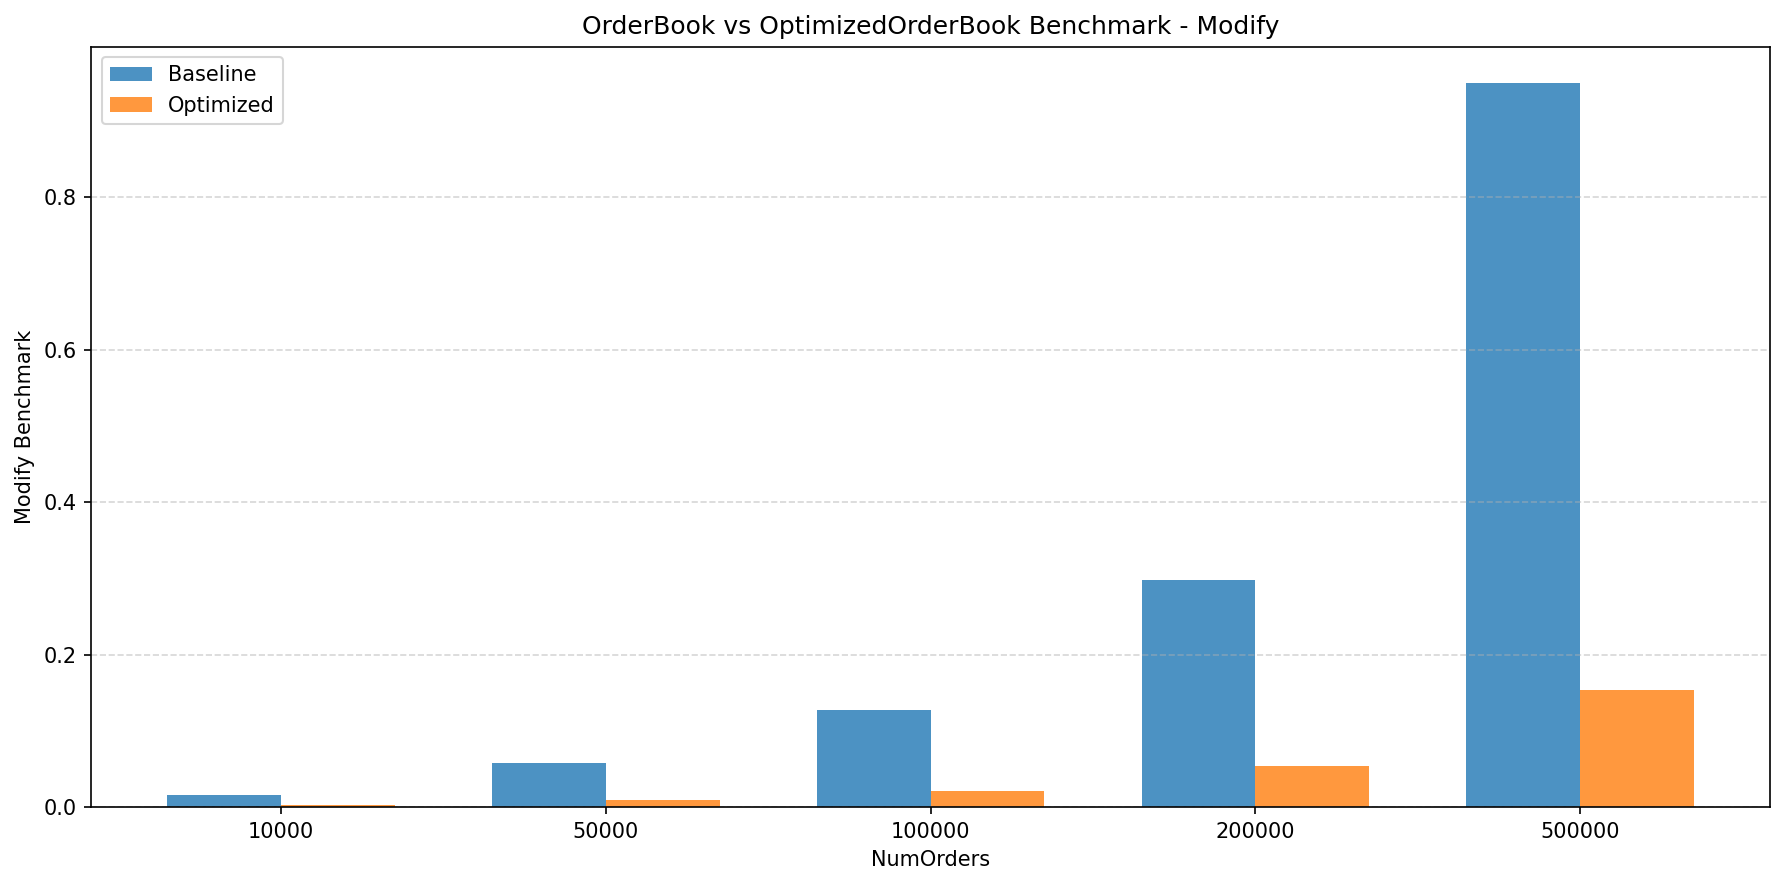

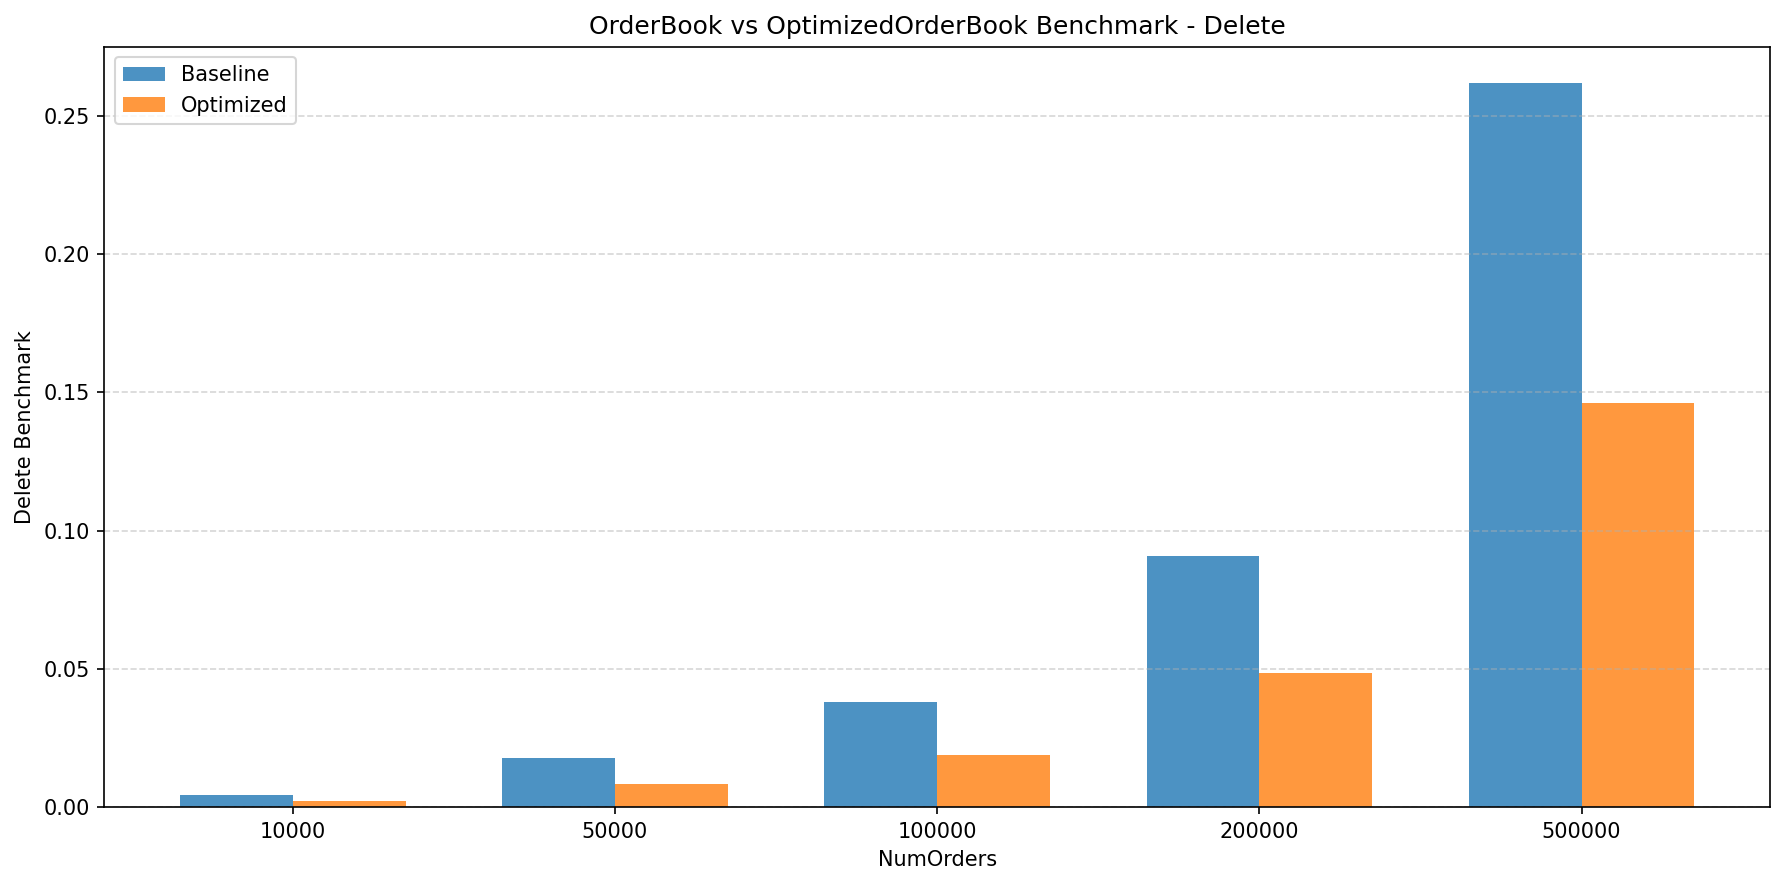

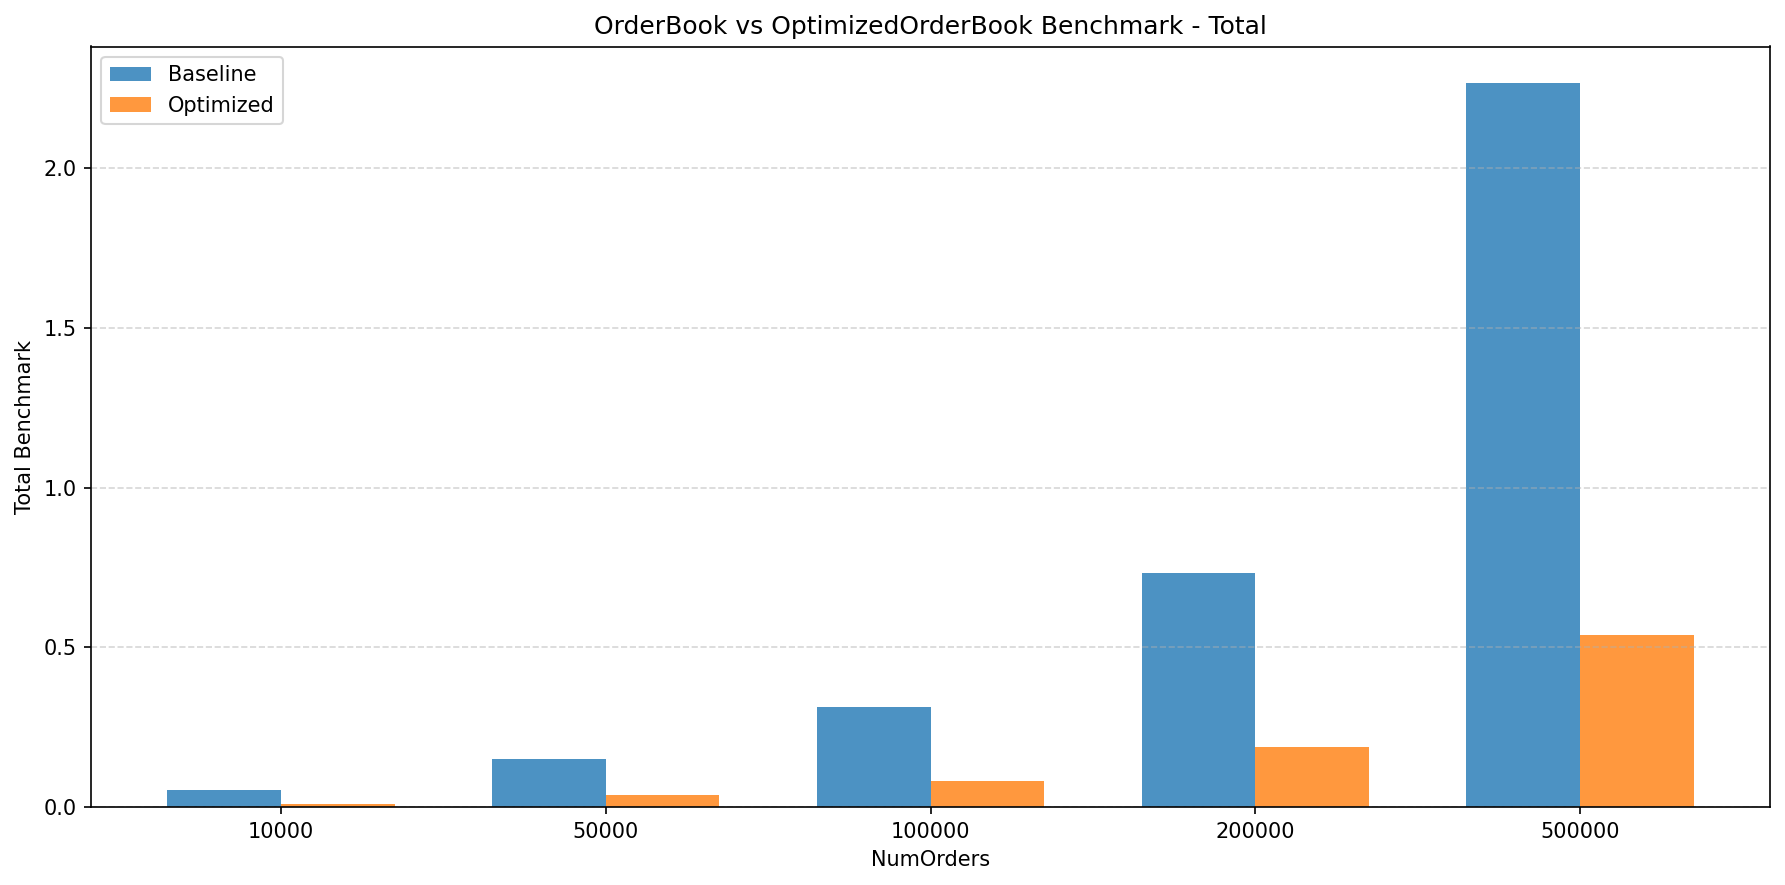

In [16]:
benchmarks = resultDf[resultDf['TestType'].isin(['OrderBook_Benchmark'])]
optBenchmarks = resultDf[resultDf['TestType'].isin(['OptimizedOrderBook_Benchmark'])]
lookupBenchmarks = resultDf[resultDf['TestType'].isin(['OrderBook_Lookup'])]
optimizedLookupBenchmarks = resultDf[resultDf['TestType'].isin(['OptimizedOrderBook_Lookup'])]

x = np.arange(len(benchmarks['NumOrders']))
width = 0.35

for criteria in ['Insert', 'Modify', 'Delete', 'Total']:
    plt.figure(figsize=(12, 6), dpi=150)

    plt.bar(x - width/2, benchmarks[criteria], width, label='Baseline', alpha=0.8)
    plt.bar(x + width/2, optBenchmarks[criteria], width, label='Optimized', alpha=0.8)

    plt.xlabel('NumOrders')
    plt.ylabel(f'{criteria} Benchmark')
    plt.title(f'OrderBook vs OptimizedOrderBook Benchmark - {criteria}')
    plt.xticks(x, benchmarks['NumOrders'])
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

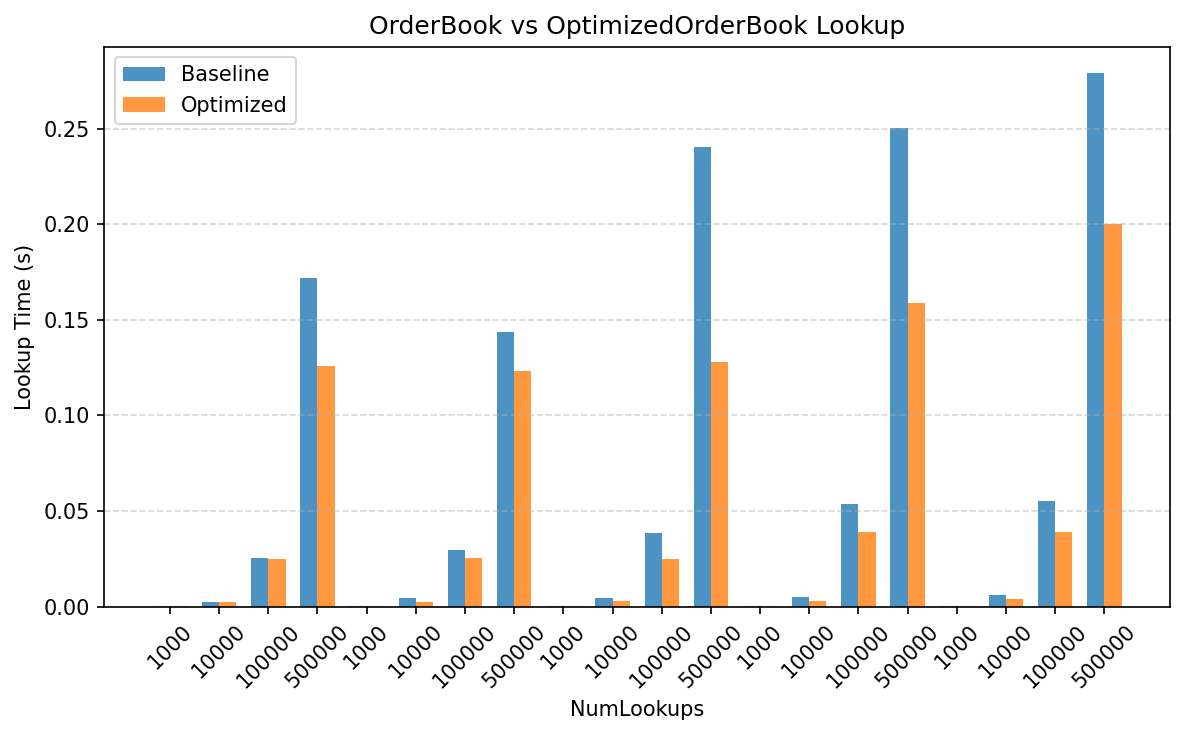

In [19]:
plt.figure(figsize=(8, 5), dpi=150)
x2 = np.arange(len(lookupBenchmarks['NumLookups']))
width = 0.35

plt.bar(x2 - width/2, lookupBenchmarks['LookupTime'], width, label='Baseline', alpha=0.8)
plt.bar(x2 + width/2, optimizedLookupBenchmarks['LookupTime'], width, label='Optimized', alpha=0.8)

plt.xlabel('NumLookups')
plt.ylabel('Lookup Time (s)')
plt.title('OrderBook vs OptimizedOrderBook Lookup')
plt.xticks(x2, lookupBenchmarks['NumLookups'])
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()